In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

### Pacejka Magic Formula

In [2]:
def fit(data, b0, b1, b2, b3, b4, b5, b6, b7, b8, b9, b10, b11, b12, b13):
    FZ = data[0] / 1000 * -1
    SR = data[1]

    C = b0
    D = FZ * (b1 * FZ + b2)
    
    BCD = (b3 * FZ**2 + b4 * FZ) * np.exp(-1 * b5 * FZ)
    B = BCD / (C * D)
    H = b9 * FZ + b10

    E = (b6 * FZ**2 + b7 * FZ + b8) * (1 - b13 * np.sign(SR + H))

    V = b11 * FZ + b12
    Bx1 = B * (SR + H)

    return (D * np.sin(C * np.arctan(Bx1 - E * (Bx1 - np.arctan(Bx1)))) + V)

### Desired Parameters for Filtering

In [3]:
tires = {"hoosier_r25b_18x7-5_10x7":{"long":None, "lat":None}}

camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
run_num = 1

### Import and Filter Tire Data

In [4]:
for name, tire in tires.items():
    try:
        df = pd.read_csv(f"../tire_data/processed_data/braking_{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["slip_a"] == slip_angle)]
        # print(tire["long"])
        
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../tire_data/processed_data/cornering_{name}.csv")
        tire["lat"] = df[(df["velocity"] == velocity) & (df["pressure"] == pressure)]
        # print(tire["lat"])

    except:
        print("Error getting lateral data for {0}".format(name))

Error getting lateral data for hoosier_r25b_18x7-5_10x7


### Define Coefficients

In [5]:
df = tires["hoosier_r25b_18x7-5_10x7"]["long"]
x_lst = df["FZ"].tolist()
y_lst = [x * 100 for x in df["SL"].tolist()]
z_lst = df["FX"].tolist()

# coeffs = [0.3937541182391694, 4000.565626067823, 1099.213711223192, 199.63775272352947, 100.74737649619918, -0.7577632970620142, 1.0873551075590915, 0.0934101472746297, -2.096363666822987, 0.09514776104932565, -0.518114565354183, 1.5026174005554935, 0.23914830384366614, 0.32595818345258964]
correct_behavior = [0.46024966176377113, 4000.509873697152, 1097.1712081460967, 202.18848632159495, 100.8812198037175, -0.2557010431649166, 0.3066955241461764, 0.011822770671297778, -1.9521015799737094, 0, 0, 0, 0, 0]
# correct_behavior = [1.1847851643921228, 1999.4071001909376, 1099.351591457873, 100.35588935509399, 100.30768138574598, -0.6430481840387927, 0.2066998423634806, 0.3842837256677387, -2.1307826732464523, 0.2914311314578536, 0.0986299084691391, 0.4355789271042124, 0.17768107586251225, -0.4862380426457774]
# more accurate but wrong behavior = [0.8748442667479049, 1999.47432054268, 1097.4722565371883, 100.09467828037941, 99.37763450629173, -1.3233273247130537, -1.0987648872844422, 1.4447389157024, -1.9425305997817333, 0.24478890698981337, 0.9258941692529677, 0.799555811930367, 0.07245740120603172, -0.9474970953451091]
# optimal = [3.2830448569632367, 1.0939113923913848, 1100.6180771718766, -0.11178686386188946, 302.6442498166806, -0.8045716131730001, 2.353276544489225, 0.5608859207990324, -1.2956213374216716, 0.22131751748820938, -0.244664665284625, -2.9176253872586386, -0.05314147446080886, -1.1507389153352072]

### Plotting

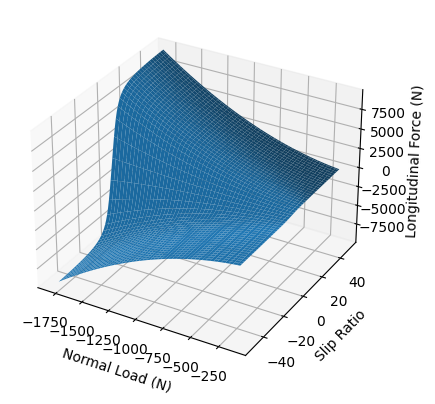

In [6]:
model_x_data = np.linspace(-1800, max(x_lst), 1000)
model_y_data = np.linspace(-50, 50, 100)

X, Y = np.meshgrid(model_x_data, model_y_data)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)

Z = fit([X, Y], *correct_behavior)

# print(fit([500, 10], *correct_behavior))

ax = plt.axes(projection='3d')

# ax.scatter3D(x_lst, y_lst, z_lst, cmap='Greens')

fig.add_axes(ax)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Normal Load (N)')
ax.set_ylabel('Slip Ratio')
ax.set_zlabel('Longitudinal Force (N)')

plt.show()

In [8]:
Z = fit([-700, 0], *correct_behavior)
print(Z)

0.0
